#### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피쳐 : Weight, Length
- 타겟 : Species
- 유형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터 준비

In [1]:
import matplotlib.pyplot as plt
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈
import matplotlib.pyplot as plt

In [2]:
data_file = '../data/fish.csv'

In [3]:
# 5개 피쳐/특성 중 2개 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])   # Boolean Indexing

# 해당 행만 도출
twofishDF = fishDF[mask]
twofishDF.index

# 인덱스 정리
twofishDF.reset_index(drop=True, inplace=True)
twofishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [5]:
# Bream, Smelt 품종명을 수치화
# twofishDF.Species = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF.loc[:, 'Species'] = twofishDF.Species.replace({'Bream':0, 'Smelt':1}).copy()
twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()

C:\Users\kdp\AppData\Local\Temp\ipykernel_23236\1337506430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twofishDF['Species'] = twofishDF['Species'].astype('int32').copy()


In [6]:
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int32  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 1.1 KB


#(2) 데이터 전처리
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [7]:
# 표준 정규분포 => 평균 0, 표준편차 1 =>  Z-score = (피쳐 - 평균) / 표준편차
# Weight 컬럼
twofishDF.Weight.mean(), twofishDF.Weight.std()

(444.5, 328.1432328267642)

In [8]:
ret1 = twofishDF.Weight - twofishDF.Weight.mean()
ret1 = ret1/twofishDF.Weight.std()

In [9]:
twofishDF.loc[:, 'Weight'] = ret1

In [10]:
# Length 컬럼
ret2 = twofishDF.Length - twofishDF.Length.mean()
ret2 = ret2 / twofishDF.Length.std()

twofishDF.loc[:, 'Length'] = ret2

In [11]:
twofishDF

,Species,Weight,Length
0,0,-0.617109,-0.161587
1,0,-0.470831,-0.073720
2,0,-0.318458,-0.054194
3,0,-0.248367,0.189879
4,0,-0.044188,0.189879
5,0,0.016761,0.258220
6,0,0.169133,0.258220
7,0,-0.166086,0.287509
8,0,0.016761,0.287509
9,0,0.169133,0.355850


(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [12]:
# 피쳐/특성/속성 데이터 추출
featureDF=twofishDF[twofishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,-0.617109,-0.161587
1,-0.470831,-0.073720


In [13]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수인코딩
targetDF = twofishDF['Species']
targetDF.head(2)

0    0
1    0
Name: Species, dtype: int32

In [14]:
targetDF = targetDF.replace({'Bream':0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int32'),
 0    0
 1    0
 Name: Species, dtype: int32)

(3-1) 학습/테스트 데이터셋 분리
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80:20

In [15]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF,
                                                    test_size=0.2, 
                                                    stratify=targetDF)

In [17]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---->\n{X_train.shape}, {y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---->\n{X_test.shape}, {y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---->
(39, 2), (39,)

Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---->
(10, 2), (10,)

Species
0    0.7
1    0.3
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [18]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [19]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메소드
# (3) 데이터에 대한 스케일링 진행 : transfrom() 메소드

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
scaler.mean_

array([0.02519225, 0.0179013 ])

In [23]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [24]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

(3-3) 시각화

In [25]:
# 모듈 로딩
import matplotlib.pyplot as plt

<Axes: xlabel='Weight', ylabel='Length'>

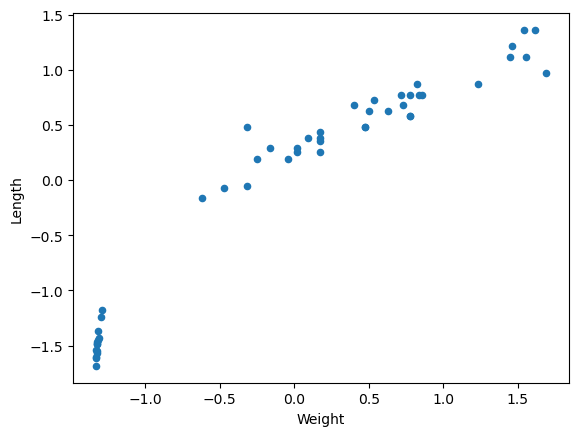

In [26]:
# => 원본 데이터 시각화
twofishDF.plot(kind='scatter', x='Weight', y='Length')

In [27]:
print(scaled_X_train)

[[ 0.7870256   0.85747605]
 [ 1.49802997  1.34681708]
 [-0.49037208 -0.09184555]
 [-1.33453914 -1.49136089]
 [-0.33973556  0.46600323]
 [-1.33423787 -1.51093454]
 [ 0.44357434  0.46600323]
 [-1.33484041 -1.5892291 ]
 [-1.3438786  -1.70667095]
 [-1.30471311 -1.26626402]
 [ 0.74484738  0.56387143]
 [-0.06858983  0.17239861]
 [ 0.50382895  0.71067374]
 [ 0.44357434  0.46600323]
 [-1.30411056 -1.19775628]
 [ 1.40764806  1.10214657]
 [ 0.69965642  0.66173964]
 [-1.33453914 -1.56965546]
 [-0.33973556 -0.07227191]
 [ 0.59421086  0.61280554]
 [ 0.47370164  0.61280554]
 [ 0.1423013   0.36813502]
 [ 0.1423013   0.24090635]
 [-0.27044276  0.17239861]
 [ 0.82016564  0.75960785]
 [-1.33785314 -1.55986864]
 [ 1.57334823  1.34681708]
 [ 1.64866649  0.95534426]
 [ 0.36825608  0.66173964]
 [-1.32730859 -1.39349269]
 [-1.34146842 -1.6381632 ]
 [-0.00833522  0.24090635]
 [ 0.74484738  0.56387143]
 [ 0.06698304  0.36813502]
 [ 1.51309363  1.10214657]
 [ 0.74484738  0.75960785]
 [-0.63498314 -0.17992693]
 

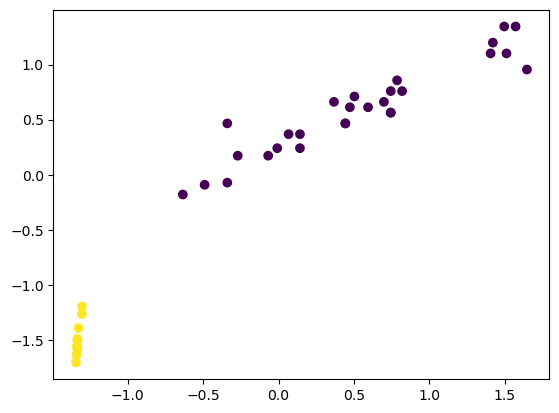

In [28]:
# => 스케일된 데이터 시각화
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=y_train)

(4) 학습 진행

In [39]:
# 방법 (1) : KNN 알고리즘
    
fishModel = KNeighborsClassifier()
fishModel

KNeighborsClassifier()

In [30]:
# 학습
fishModel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [31]:
fishModel.score(scaled_X_test, y_test)

1.0

In [32]:
# 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twofishDF.columns[1:])
new_data

,Weight,Length
0,160,25


In [34]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)
scaled_new_data

array([[158.15222909,  25.04317527]])

In [35]:
fishModel.predict(scaled_new_data)

array([0])

In [36]:
# 방법 2 : SVC
from sklearn.svm import SVC

fishmodel2 = SVC()
fishmodel2.fit(scaled_X_train, y_train)

SVC()

In [ ]:
# 방법 3 : 
from sklearn.linear_model import LogisticRegression

fishmodel3 = LogisticRegression()
fishmodel3.fit(scaled_X_train, y_train)